# Introduction to Neural Networks

## Import packages

In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## Load the data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
#printng shape of mnist train and test data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [4]:
X_train[0].shape

(28, 28)

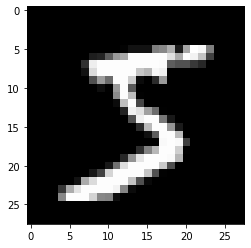

In [5]:
plt.imshow(X_train[0], cmap='gray')

In [6]:
y_train[0]

5

## Preprocessing the image data

In [0]:
image_height, image_width = 28, 28

In [0]:
X_train = X_train.reshape(60000, image_height * image_width)
X_test = X_test.reshape(10000, image_height * image_width)

In [9]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [10]:
print(X_train[0])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [11]:
X_train /= 255.0
X_test /= 255.0
print(X_train[0])


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [12]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [13]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Build a model

In [0]:
model = Sequential()

In [0]:
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

## Compile the model

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [18]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 194us/step - loss: 0.1834 - accuracy: 0.9446 - val_loss: 0.1004 - val_accuracy: 0.9678
Epoch 2/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.0807 - accuracy: 0.9750 - val_loss: 0.0943 - val_accuracy: 0.9726
Epoch 3/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.0574 - accuracy: 0.9820 - val_loss: 0.1001 - val_accuracy: 0.9704
Epoch 4/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.0433 - accuracy: 0.9858 - val_loss: 0.0753 - val_accuracy: 0.9788
Epoch 5/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.0345 - accuracy: 0.9893 - val_loss: 0.0978 - val_accuracy: 0.9764
Epoch 6/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.0297 - accuracy: 0.9906 - val_loss: 0.1011 - val_accuracy: 0.9765
Epoch 7/20
60000/60000 [==============================] 

## What is the accuracy of the model?

### Plot the accuracy of the training model

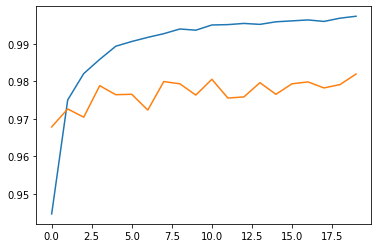

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

### Plot the accuracy of training and validation set

### Accuracy of training and validation with loss

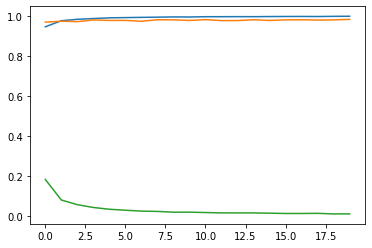

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])

# Evaluting the model

In [21]:
score = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 78us/step


## Run a prediction

In [22]:
score

[0.13963400407926105, 0.9818999767303467]

## Experiment further
- What results do you get with a model with more than 2 hidden layers and more/less neurons
- What results do you get when trying to use another activation function?

# Convolution Neural Network

## Import the libraries

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

## Load the data

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Pre-processing

In [0]:
batch_size = 128
num_classes = 10
#epochs = 3

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0


y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)



In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## Use the model

In [28]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(5,5),input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(64, kernel_size=(5,5),padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(1024,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              3212288   
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [0]:
history_cnn = cnn.fit(X_train,y_train,epochs=20,verbose=1,validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 25s 420us/step - loss: 0.0988 - accuracy: 0.9698 - val_loss: 0.0312 - val_accuracy: 0.9894
Epoch 2/20
60000/60000 [==============================] - 21s 352us/step - loss: 0.0362 - accuracy: 0.9887 - val_loss: 0.0286 - val_accuracy: 0.9908
Epoch 3/20
60000/60000 [==============================] - 21s 351us/step - loss: 0.0249 - accuracy: 0.9921 - val_loss: 0.0248 - val_accuracy: 0.9924
Epoch 4/20
60000/60000 [==============================] - 21s 348us/step - loss: 0.0178 - accuracy: 0.9942 - val_loss: 0.0259 - val_accuracy: 0.9915
Epoch 5/20
60000/60000 [==============================] - 21s 349us/step - loss: 0.0140 - accuracy: 0.9955 - val_loss: 0.0418 - val_accuracy: 0.9892
Epoch 6/20
60000/60000 [==============================] - 21s 349us/step - loss: 0.0112 - accuracy: 0.9966 - val_loss: 0.0339 - val_accuracy: 0.9917
Epoch 7/20
60000/60000 [==============================] 

In [0]:
cnn.load_weights('weights/cnn-model5.h5')

Recall that when using neural networks we got good accuracy.

In [0]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])

Comparing this to using CNNs - the performance is far superior.

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])

In [0]:
score = cnn.evaluate(X_test, y_test)

In [0]:
score

## Not related just testing out files

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('data/olympics.csv',skiprows=4)
df.head()